In [1]:
from datasets.ae_dataset import AEDataset
import matplotlib.pyplot as plt
from models.ae import AE
import torch
from tqdm import tqdm
from collections import OrderedDict

# Load data

In [2]:
dataset = AEDataset(r'D:\dataset', r'src\test.txt')
print(len(dataset))

D:\dataset
306974


### Sample data

torch.Size([1, 112, 112])


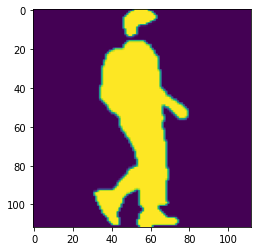

In [3]:

image = dataset.__getitem__(100)
print(image.shape)
plt.imshow(image[0])


In [5]:
batch_size = 512
epochs = 20
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [6]:
device = torch.device('cpu')
model = AE()
model.to(device)
model.train()

AE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): Hardswish()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): Hardswish()
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): Hardswish()
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): Hardswish()
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

In [8]:
losses = []
for epoch in range(epochs):
    loss_epoch = 0
    # pbar = tqdm(train_loader, desc='Epoch: [%d]/[%d] Training' % (epoch, epochs), leave=True)
    iter = 0
    for b, imgs in enumerate(train_loader):
        imgs = imgs.to(device)
        optimizer.zero_grad()  # grad = 0
        # print(batch_features.shape)
        outputs = model(imgs)
        # print(outputs.shape)

        train_loss = criterion(outputs, imgs)
        train_loss.backward()
        optimizer.step()
        loss_epoch += train_loss / len(imgs)
        losses.append(train_loss.item())
        iter += len(imgs)
        print(f'Epoch: [%d]/[%d] Training, %.2f%%,{iter}/{len(dataset) * epochs}, Loss={train_loss.item()}' % (epoch, epochs, iter*100/len(dataset)))

    print(loss_epoch.item())
    torch.save(model.state_dict(), f'src/ae_epoch_{epoch}_loss_%.2f.pt' % loss_epoch.item())


Epoch: [0]/[20] Training, 0.17%,512/6139480, Loss=1.5067448616027832
Epoch: [0]/[20] Training, 0.33%,1024/6139480, Loss=1.503378987312317
Epoch: [0]/[20] Training, 0.50%,1536/6139480, Loss=1.4966633319854736
Epoch: [0]/[20] Training, 0.67%,2048/6139480, Loss=1.4907424449920654
Epoch: [0]/[20] Training, 0.83%,2560/6139480, Loss=1.4866862297058105
Epoch: [0]/[20] Training, 1.00%,3072/6139480, Loss=1.4796419143676758
Epoch: [0]/[20] Training, 1.17%,3584/6139480, Loss=1.4742746353149414
Epoch: [0]/[20] Training, 1.33%,4096/6139480, Loss=1.4669464826583862
Epoch: [0]/[20] Training, 1.50%,4608/6139480, Loss=1.4591217041015625
Epoch: [0]/[20] Training, 1.67%,5120/6139480, Loss=1.4517501592636108
Epoch: [0]/[20] Training, 1.83%,5632/6139480, Loss=1.4474009275436401
Epoch: [0]/[20] Training, 2.00%,6144/6139480, Loss=1.438948392868042
Epoch: [0]/[20] Training, 2.17%,6656/6139480, Loss=1.428153157234192
Epoch: [0]/[20] Training, 2.34%,7168/6139480, Loss=1.4194790124893188
Epoch: [0]/[20] Training